# Support Vector Regression




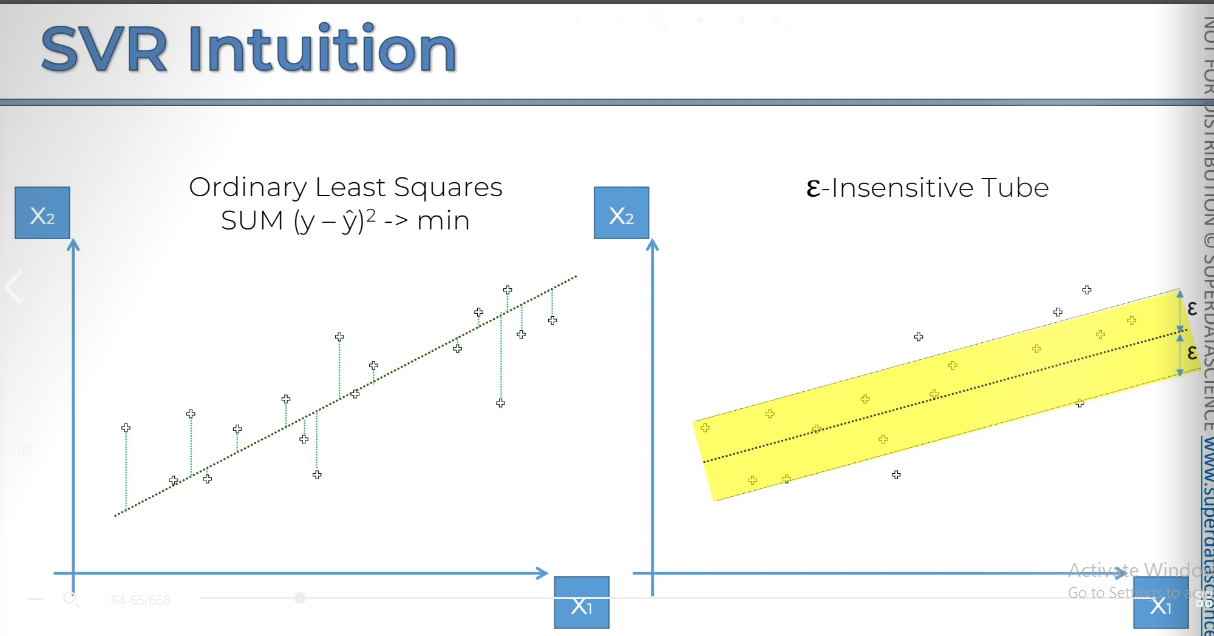

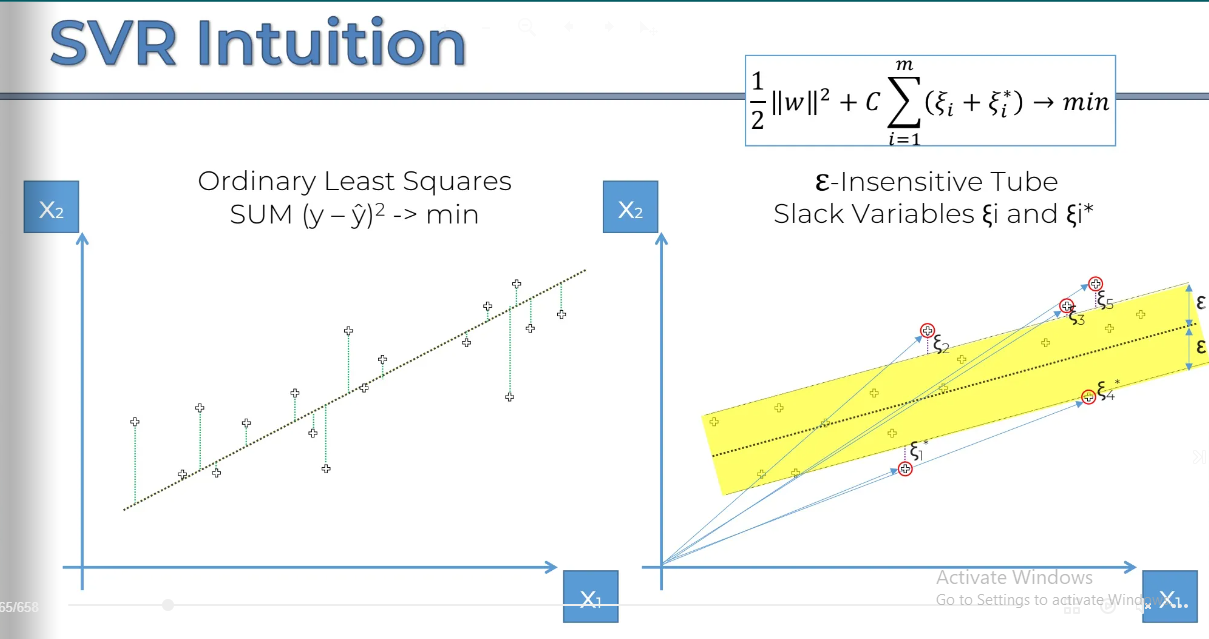

- SVR contains a tube having radius (measured along y-axis) equal to '$\epsilon$'.
- This tube is known as $\epsilon$-insensitive tube.
- The data-points falls inside this tube, their `errors` won't be considered. Means the `distance` between that `data-point` and the `regression line`.
- But the `errors` of the points lies outside of the tube, will be considered.
- `ERROR` is defined as the distance between the `data-points` and the `line`.
- The data-points `outside` the tube is known as `slack-variables`.
- The points above the tube is denoted as $\xi_i$ and the points below the tube is denoted as $\overset{*}{\xi_i}$

- The `points` lies outside of the `tube` is known as `Support Vectors`, because they helps to structure the `tube`.

# Importing the Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

## Importing the Dataset

In [2]:
dataset = pd.read_csv('Position_Salaries.csv')
X = dataset.iloc[:, 1:-1].values
y = dataset.iloc[:, -1].values

In [3]:
print(X)

[[ 1]
 [ 2]
 [ 3]
 [ 4]
 [ 5]
 [ 6]
 [ 7]
 [ 8]
 [ 9]
 [10]]


In [4]:
print(y)

[  45000   50000   60000   80000  110000  150000  200000  300000  500000
 1000000]


we have to transform the `y` to `2-D` array in order to apply the feature scaling

In [5]:
y = y.reshape(len(y), 1)

In [6]:
print(y)

[[  45000]
 [  50000]
 [  60000]
 [  80000]
 [ 110000]
 [ 150000]
 [ 200000]
 [ 300000]
 [ 500000]
 [1000000]]


## Feature Scaling

- In this dataset, we have to apply the `feature scaling` on both the variables i.e. on `features` as well as on the `dependent variables`.
- Here we are applying the `feature scaling` on `dependent` variable, because in this dataset `Position_Salaries.csv`, the values of dependent variable is also varying.
- If we don't apply the `feature scaling` on the `dependent variable`, the values of `independent variable/feature` will be neglected by the model.

In [7]:
from sklearn.preprocessing import StandardScaler
sc_X = StandardScaler()
sc_y = StandardScaler()
X = sc_X.fit_transform(X)
y = sc_y.fit_transform(y)

It’s not strictly necessary to create `two` different `StandardScaler objects` for `X` and `y`, but there are some reasons why you might choose to do so:

### Reasons to Use Separate Scalers:
**Different Scales:**  
`Input Features (X)`: Features may have different `ranges` and scales that are meaningful for modeling. Separate scaling helps ensure that each feature contributes equally to the model.  
`Target Variable (y)`: The target variable may have a different scale or range compared to the input features. Using a separate scaler for y ensures that transformations are appropriate for the output.  

**Interpretability:**
Keeping separate scalers maintains clarity and avoids confusion about which scaling parameters apply to features versus the target variable.  

**Inverse Transformations:**
When making predictions, you need to convert the scaled output back to its `original scale`. Separate scalers make it straightforward to reverse the scaling for `y` without affecting `X`.

In [8]:
print(X)

[[-1.5666989 ]
 [-1.21854359]
 [-0.87038828]
 [-0.52223297]
 [-0.17407766]
 [ 0.17407766]
 [ 0.52223297]
 [ 0.87038828]
 [ 1.21854359]
 [ 1.5666989 ]]


In [9]:
print(y)

[[-0.72004253]
 [-0.70243757]
 [-0.66722767]
 [-0.59680786]
 [-0.49117815]
 [-0.35033854]
 [-0.17428902]
 [ 0.17781001]
 [ 0.88200808]
 [ 2.64250325]]


## Training the SVR model on the whole dataset

In [10]:
from sklearn.svm import SVR
regressor = SVR(kernel = 'rbf') # "rbf(Radial Basis Function)" is a kernel of SVM.
regressor.fit(X, y)

/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


SVR()

### Guassian radial basis function (RBF).
It is a general purpose kernel, used when there is no `prior` knowledge about the data.  
Equation is: $$\phi(x) = \exp\left(-\gamma \| x - c \|^2 \right)$$
Where:  
- `ϕ(x)` is the output of the Gaussian RBF
- `x` is the input vector.
- `c` is the center vector.
- `∥x−c∥` is the Euclidean distance between the input
`𝑥` and the center `𝑐`.
- `γ` is a parameter that controls the spread of the RBF.

## Predicting a new result

In [11]:
output = regressor.predict(sc_X.transform([[6.5]])) # output will be a 1-D array.
sc_y.inverse_transform(output.reshape(-1, 1))

array([[170370.0204065]])

Since, `SVR` model is trained on the `scaled` value of `X` therefore, we have to entered `scaled` value of `X` in predict method.

- `inverse_transform()` function expects a `2-D` array.
- reshape(-1, 1) transforms a `1-D` to `2-D` array with only `one` column.

In [12]:
print(output)

[-0.27861589]


## Visualizing the SVR results

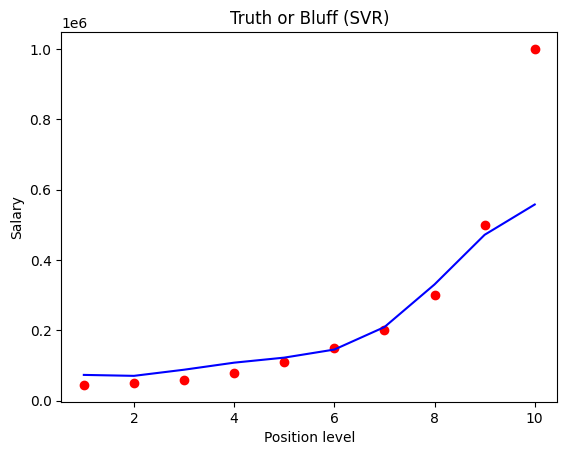

In [17]:
# Putting the values of X and y to their original scale.
plt.scatter(sc_X.inverse_transform(X), sc_y.inverse_transform(y), color='red')
plt.plot(sc_X.inverse_transform(X), sc_y.inverse_transform(regressor.predict(X).reshape(-1, 1)), color='blue')
plt.title('Truth or Bluff (SVR)')
plt.xlabel('Position level')
plt.ylabel('Salary')
plt.show()

- `dots` representing the `actual` value.
- `line` representing the `predicted` value.

## Visualizing the SVR results (for higher resolution and smoother curve)

<ipython-input-14-44d11db6d5b7>:1: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  X_grid = np.arange(min(sc_X.inverse_transform(X)), max(sc_X.inverse_transform(X)), 0.1)


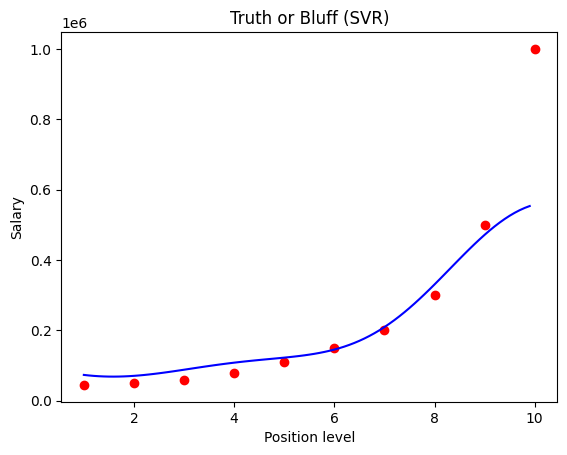

In [14]:
X_grid = np.arange(min(sc_X.inverse_transform(X)), max(sc_X.inverse_transform(X)), 0.1)
X_grid = X_grid.reshape((len(X_grid), 1))
plt.scatter(sc_X.inverse_transform(X), sc_y.inverse_transform(y), color='red')
plt.plot(X_grid, sc_y.inverse_transform(regressor.predict(sc_X.transform(X_grid)).reshape(-1, 1)), color='blue')
plt.title('Truth or Bluff (SVR)')
plt.xlabel('Position level')
plt.ylabel('Salary')
plt.show()